In [4]:
%load_ext autoreload
%autoreload 2

### Train Model

100%|██████████| 100/100 [00:36<00:00,  2.71it/s]


Final metrics: 
Validation-Loss:  0.624
Validation-Accuracy:  71.0%
train-Loss:  0.545
train-Accuracy:  72.8%
# Parameters: 392
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=23, out_features=15, bias=True)
    (1): ReLU()
    (2): Linear(in_features=15, out_features=2, bias=True)
  )
)


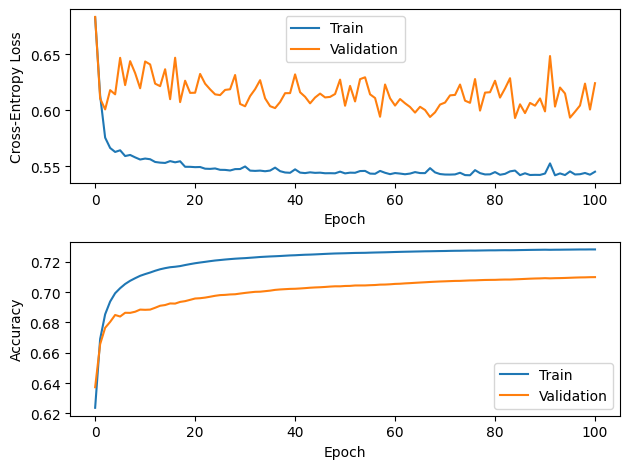

In [5]:
from network.training_heloc import train_model_and_visualize

model = train_model_and_visualize(
    layers=[23,15,2],
    num_epochs=100,
    lr = 0.001,
    batch_size=32,
)

### Zero Baseline

  0%|          | 0/986 [00:00<?, ?it/s]

/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
100%|██████████| 986/986 [00:09<00:00, 104.74it/s]


Mean: [0.77055588 0.38810935 0.2395528  0.23931326 0.1980548  0.18191549
 0.17443301 0.17004808 0.16725476 0.16634517 0.1658729  0.16651285
 0.16817797 0.17153301 0.17849491 0.18828774 0.19966114 0.21015766
 0.22217233 0.22837604 0.25203562 0.35056019 0.49094847]


100%|██████████| 986/986 [00:02<00:00, 462.65it/s]


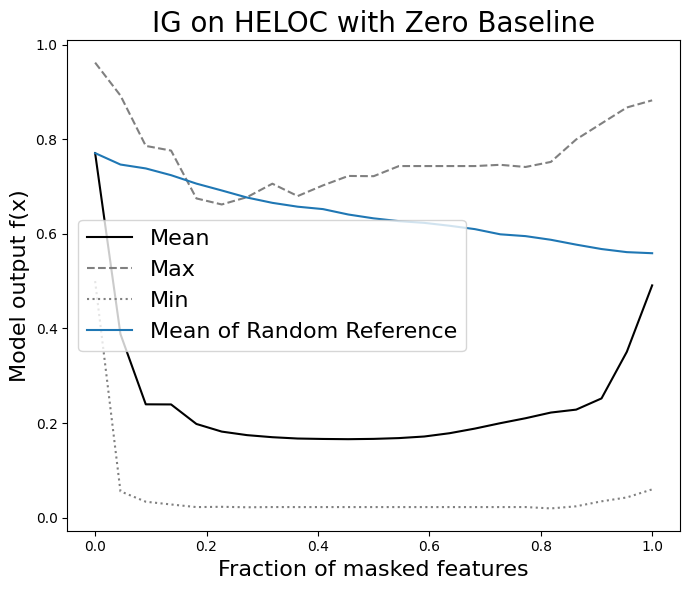

In [7]:
from evaluation.attribution_methods_evaluator_heloc import AttributionMethodsEvaluator
from attribution import IntegratedGradient
from baselines import ZeroBaseline
from data import HELOC

data = HELOC(mode="validation")
baseline_generator = ZeroBaseline(model)

ig = IntegratedGradient(model)

evaluator = AttributionMethodsEvaluator(model,dataset="HELOC")
evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC with Zero Baseline",
    attribution_baseline=baseline_generator,
    masking_baseline=baseline_generator,
    apply_log=False
)

### Zero Uniform Output Baseline

/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


Prediction of zero baseline: [[0.82193214 0.17806791]])


  0%|          | 0/300 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:68: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 300/300 [00:11<00:00, 26.13it/s]


autobaseline: tensor([ 0.0074,  0.0057,  0.0063,  0.0060,  0.0095,  0.0080,  0.0076,  0.0084,
         0.0087,  0.0082, -0.1441,  0.0072,  0.0070,  0.0086,  0.0080,  0.0060,
         0.0066, -0.0320,  0.0072, -0.0483,  0.0089, -0.0539,  0.0067],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5024, 0.4976])


  0%|          | 0/100 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
100%|██████████| 100/100 [00:01<00:00, 78.56it/s]


Mean: [0.77265151 0.42577006 0.28536788 0.21114943 0.16369081 0.12241601
 0.10558674 0.09029339 0.0811959  0.07615885 0.07501679 0.07343086
 0.07266805 0.07022393 0.0713752  0.0740374  0.07398524 0.08254183
 0.08962171 0.073379   0.08246111 0.13648305 0.29174476]


100%|██████████| 986/986 [00:03<00:00, 325.66it/s]


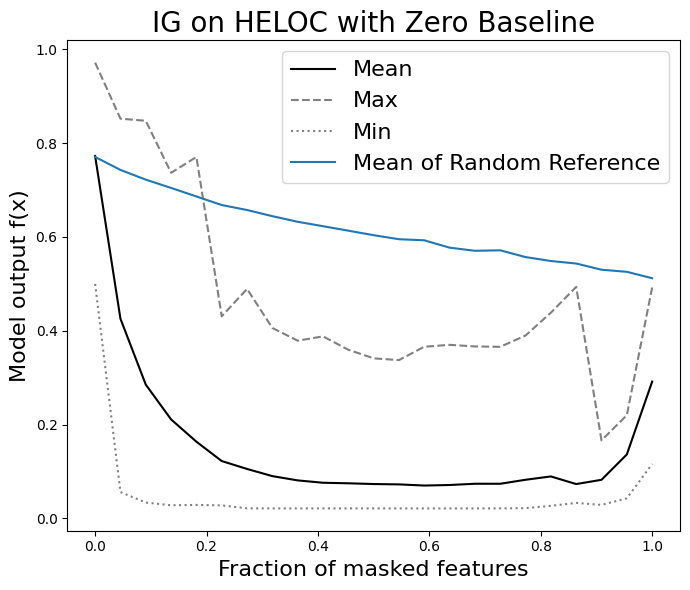

In [17]:
from evaluation.attribution_methods_evaluator_heloc import AttributionMethodsEvaluator
from attribution import IntegratedGradient
from data import HELOC
import torch
from baselines import ZeroUniformOutputBaseline, set_precomputed_zero_uniform_output_baseline, get_precomputed_zero_uniform_ouput_baseline

print(f"Prediction of zero baseline: {model.predict(torch.zeros(1, 23)).detach().numpy()})")
set_precomputed_zero_uniform_output_baseline(model)
baseline_generator = get_precomputed_zero_uniform_ouput_baseline()

data = HELOC(mode="validation")

ig = IntegratedGradient(model)

evaluator = AttributionMethodsEvaluator(model,dataset="HELOC")
evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC with Zero Baseline",
    attribution_baseline=baseline_generator,
    masking_baseline=baseline_generator,
    apply_log=False
)

### Furthest Uniform Output Baseline

In [11]:
from baselines import FurthestUniformOutputBaseline
from evaluation.attribution_methods_evaluator_heloc import AttributionMethodsEvaluator
from attribution import IntegratedGradient
from data import HELOC

baseline_generator = FurthestUniformOutputBaseline(model,data)

data = HELOC(mode="validation")

ig = IntegratedGradient(model)

evaluator = AttributionMethodsEvaluator(model,dataset="HELOC")
evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC with Furthest Uniform Output Baseline",
    attribution_baseline=baseline_generator,
    masking_baseline=baseline_generator,
    apply_log=False,
    num_samples=100
)

  0%|          | 0/100 [00:00<?, ?it/s]

max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


/home/leon/programming/XAI-baselines/network/models.py:68: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 300/300 [00:15<00:00, 19.99it/s]
/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
  1%|          | 1/100 [00:15<24:54, 15.10s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  2%|▏         | 2/100 [00:25<19:51, 12.16s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  3%|▎         | 3/100 [00:33<17:09, 10.61s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  4%|▍         | 4/100 [00:41<15:12,  9.51s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  5%|▌         | 5/100 [00:50<14:19,  9.05s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  6%|▌         | 6/100 [00:57<13:34,  8.67s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


  7%|▋         | 7/100 [01:07<13:58,  9.02s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


  8%|▊         | 8/100 [01:16<13:44,  8.96s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  9%|▉         | 9/100 [01:28<14:51,  9.80s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 10%|█         | 10/100 [01:38<14:55,  9.95s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 11%|█         | 11/100 [01:47<14:33,  9.82s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 12%|█▏        | 12/100 [01:56<13:58,  9.53s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 13%|█▎        | 13/100 [02:06<13:51,  9.56s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 14%|█▍        | 14/100 [02:14<13:14,  9.24s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 15%|█▌        | 15/100 [02:22<12:30,  8.83s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 16%|█▌        | 16/100 [02:34<13:38,  9.74s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 17%|█▋        | 17/100 [02:44<13:27,  9.73s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 18%|█▊        | 18/100 [02:54<13:18,  9.74s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 19%|█▉        | 19/100 [03:03<12:53,  9.55s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 20%|██        | 20/100 [03:12<12:45,  9.56s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 21%|██        | 21/100 [03:23<13:00,  9.88s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 22%|██▏       | 22/100 [03:34<13:06, 10.09s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 23%|██▎       | 23/100 [03:43<12:32,  9.78s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 24%|██▍       | 24/100 [03:53<12:28,  9.84s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 25%|██▌       | 25/100 [04:03<12:36, 10.08s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 26%|██▌       | 26/100 [04:11<11:44,  9.52s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 27%|██▋       | 27/100 [04:20<11:23,  9.36s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 28%|██▊       | 28/100 [04:31<11:42,  9.75s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 29%|██▉       | 29/100 [04:40<11:11,  9.46s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 30%|███       | 30/100 [04:50<11:16,  9.66s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 31%|███       | 31/100 [05:01<11:30, 10.01s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.6415, 0.1342, 0.1776, 0.1792, 0.0476, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0353, 0.0000, 1.0000, 0.2500, 0.0303, 0.0303, 0.0000,
        0.7571, 0.0000, 0.3750, 0.0000, 1.0000])


 32%|███▏      | 32/100 [05:09<10:49,  9.55s/it]

autobaseline: tensor([ 6.4184e-01,  1.3446e-01,  1.7735e-01,  1.7947e-01,  4.7955e-02,
        -2.4743e-04,  8.7904e-05,  1.0001e+00,  1.1049e-02,  1.0001e+00,
         1.0002e+00,  3.5257e-02, -2.4172e-04,  9.9976e-01,  2.5017e-01,
        -3.1501e-02,  3.0417e-02, -3.2187e-04,  7.5719e-01, -3.4136e-04,
         3.7518e-01,  2.5795e-04,  1.0002e+00], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4986, 0.5014])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 33%|███▎      | 33/100 [05:18<10:26,  9.35s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 34%|███▍      | 34/100 [05:27<09:57,  9.05s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 35%|███▌      | 35/100 [05:36<10:04,  9.29s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 36%|███▌      | 36/100 [05:45<09:34,  8.98s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 37%|███▋      | 37/100 [05:53<09:11,  8.76s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 38%|███▊      | 38/100 [06:01<08:59,  8.69s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 39%|███▉      | 39/100 [06:12<09:16,  9.12s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 40%|████      | 40/100 [06:21<09:19,  9.32s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 41%|████      | 41/100 [06:37<11:02, 11.23s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 42%|████▏     | 42/100 [06:47<10:21, 10.72s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 43%|████▎     | 43/100 [06:56<09:49, 10.33s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 44%|████▍     | 44/100 [07:06<09:31, 10.21s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.3208, 0.5074, 0.0329, 0.2667, 0.9841, 0.0909, 0.1000, 0.9700, 0.1011,
        0.1429, 0.1667, 0.7412, 0.8182, 0.2400, 0.2500, 0.0152, 0.0152, 0.1562,
        0.4857, 1.0000, 0.5417, 0.4286, 0.7315])


 45%|████▌     | 45/100 [07:14<08:52,  9.68s/it]

autobaseline: tensor([ 0.4270,  0.5076,  0.0327,  0.2668,  0.9843,  0.0910,  0.1001,  0.9701,
         0.1010,  0.1428,  0.1667,  0.7411,  0.8181,  0.2399,  0.2501, -0.1885,
         0.0152,  0.0662,  0.4859,  0.9814,  0.5418,  0.4287,  0.7314],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4998, 0.5002])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 46%|████▌     | 46/100 [07:22<08:16,  9.19s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 47%|████▋     | 47/100 [07:31<08:03,  9.12s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 48%|████▊     | 48/100 [07:41<08:00,  9.24s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 49%|████▉     | 49/100 [07:50<07:53,  9.29s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 50%|█████     | 50/100 [08:00<07:45,  9.32s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 51%|█████     | 51/100 [08:07<07:11,  8.80s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 52%|█████▏    | 52/100 [08:15<06:53,  8.62s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 53%|█████▎    | 53/100 [08:24<06:46,  8.66s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 54%|█████▍    | 54/100 [08:33<06:33,  8.56s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 55%|█████▌    | 55/100 [08:42<06:33,  8.74s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 56%|█████▌    | 56/100 [08:51<06:31,  8.90s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 57%|█████▋    | 57/100 [09:00<06:27,  9.01s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 58%|█████▊    | 58/100 [09:10<06:28,  9.26s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 59%|█████▉    | 59/100 [09:20<06:27,  9.45s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 60%|██████    | 60/100 [09:31<06:31,  9.79s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 61%|██████    | 61/100 [09:41<06:26,  9.92s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 62%|██████▏   | 62/100 [09:50<06:06,  9.64s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 63%|██████▎   | 63/100 [09:59<05:48,  9.43s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 64%|██████▍   | 64/100 [10:08<05:42,  9.52s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 65%|██████▌   | 65/100 [10:19<05:42,  9.78s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 66%|██████▌   | 66/100 [10:28<05:29,  9.70s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 67%|██████▋   | 67/100 [10:38<05:18,  9.64s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 68%|██████▊   | 68/100 [10:47<05:06,  9.58s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 69%|██████▉   | 69/100 [10:56<04:52,  9.43s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 70%|███████   | 70/100 [11:06<04:46,  9.56s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 71%|███████   | 71/100 [11:24<05:47, 11.99s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 72%|███████▏  | 72/100 [11:41<06:15, 13.42s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 73%|███████▎  | 73/100 [11:51<05:34, 12.38s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 74%|███████▍  | 74/100 [12:01<05:03, 11.67s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 75%|███████▌  | 75/100 [12:10<04:37, 11.11s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 76%|███████▌  | 76/100 [12:21<04:24, 11.03s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 77%|███████▋  | 77/100 [12:32<04:12, 10.99s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 78%|███████▊  | 78/100 [12:42<03:53, 10.63s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 79%|███████▉  | 79/100 [12:53<03:43, 10.63s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 80%|████████  | 80/100 [13:03<03:30, 10.53s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 81%|████████  | 81/100 [13:12<03:11, 10.08s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 82%|████████▏ | 82/100 [13:21<02:57,  9.85s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 83%|████████▎ | 83/100 [13:35<03:08, 11.08s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 84%|████████▍ | 84/100 [13:46<02:57, 11.07s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 85%|████████▌ | 85/100 [13:55<02:37, 10.49s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 86%|████████▌ | 86/100 [14:04<02:19,  9.94s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 87%|████████▋ | 87/100 [14:13<02:06,  9.74s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 88%|████████▊ | 88/100 [14:23<01:55,  9.65s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 89%|████████▉ | 89/100 [14:35<01:54, 10.43s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 90%|█████████ | 90/100 [14:45<01:44, 10.40s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 91%|█████████ | 91/100 [14:54<01:29,  9.93s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 92%|█████████▏| 92/100 [15:03<01:17,  9.63s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 93%|█████████▎| 93/100 [15:12<01:06,  9.45s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7925, 0.7365, 1.0000, 1.0000, 0.1587, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1176, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3828,
        0.0000, 0.4688, 0.0000, 0.4286, 0.8889])


 94%|█████████▍| 94/100 [15:21<00:55,  9.21s/it]

autobaseline: tensor([ 7.2979e-01,  7.3643e-01,  9.9995e-01,  9.9990e-01,  1.5867e-01,
         1.0359e-04, -1.2672e-05,  1.0000e+00,  1.1306e-02,  1.0000e+00,
         1.0001e+00,  1.1783e-01,  4.8700e-05,  1.2805e-04,  2.5618e-05,
         1.7374e-01,  1.6475e-05,  4.1404e-01,  5.2760e-05,  4.8392e-01,
         7.4434e-05,  4.2859e-01,  8.8885e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4997, 0.5003])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 95%|█████████▌| 95/100 [15:30<00:46,  9.31s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 96%|█████████▌| 96/100 [15:43<00:40, 10.18s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 97%|█████████▋| 97/100 [15:54<00:31, 10.47s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 98%|█████████▊| 98/100 [16:04<00:20, 10.30s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 99%|█████████▉| 99/100 [16:22<00:12, 12.72s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


100%|██████████| 100/100 [16:43<00:00, 10.04s/it]


autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
Mean: [0.77265151 0.42816336 0.30245343 0.24404488 0.21511055 0.19107679
 0.1799603  0.17223874 0.16612945 0.15833064 0.14977108 0.1466269
 0.13970771 0.14103422 0.14073014 0.14100521 0.14482688 0.14642347
 0.1471499  0.14418828 0.159293   0.20126929 0.33132291]


  0%|          | 0/986 [00:00<?, ?it/s]

max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  0%|          | 1/986 [00:10<2:52:49, 10.53s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  0%|          | 2/986 [00:20<2:44:12, 10.01s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  0%|          | 3/986 [00:29<2:36:48,  9.57s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  0%|          | 4/986 [00:39<2:42:07,  9.91s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  1%|          | 5/986 [00:50<2:49:44, 10.38s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  1%|          | 6/986 [01:01<2:48:53, 10.34s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


  1%|          | 7/986 [01:10<2:41:48,  9.92s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


  1%|          | 8/986 [01:20<2:44:44, 10.11s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  1%|          | 9/986 [01:31<2:50:38, 10.48s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  1%|          | 10/986 [01:41<2:44:37, 10.12s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  1%|          | 11/986 [01:50<2:40:03,  9.85s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  1%|          | 12/986 [02:00<2:41:30,  9.95s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  1%|▏         | 13/986 [02:11<2:46:35, 10.27s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  1%|▏         | 14/986 [02:21<2:41:43,  9.98s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


  2%|▏         | 15/986 [02:30<2:38:36,  9.80s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  2%|▏         | 16/986 [02:47<3:14:15, 12.02s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  2%|▏         | 17/986 [02:56<3:01:08, 11.22s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  2%|▏         | 18/986 [03:07<2:59:33, 11.13s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  2%|▏         | 19/986 [03:16<2:48:33, 10.46s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  2%|▏         | 20/986 [03:25<2:40:16,  9.95s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  2%|▏         | 21/986 [03:34<2:34:21,  9.60s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


  2%|▏         | 22/986 [03:43<2:34:21,  9.61s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  2%|▏         | 23/986 [03:54<2:36:23,  9.74s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  2%|▏         | 24/986 [04:04<2:39:49,  9.97s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  3%|▎         | 25/986 [04:14<2:37:33,  9.84s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  3%|▎         | 26/986 [04:23<2:34:19,  9.65s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  3%|▎         | 27/986 [04:32<2:31:11,  9.46s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  3%|▎         | 28/986 [04:40<2:26:53,  9.20s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  3%|▎         | 29/986 [04:50<2:29:20,  9.36s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  3%|▎         | 30/986 [04:59<2:28:15,  9.30s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


  3%|▎         | 31/986 [05:21<3:28:16, 13.09s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.6415, 0.1342, 0.1776, 0.1792, 0.0476, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0353, 0.0000, 1.0000, 0.2500, 0.0303, 0.0303, 0.0000,
        0.7571, 0.0000, 0.3750, 0.0000, 1.0000])


  3%|▎         | 32/986 [05:31<3:13:50, 12.19s/it]

autobaseline: tensor([ 6.4184e-01,  1.3446e-01,  1.7735e-01,  1.7947e-01,  4.7955e-02,
        -2.4743e-04,  8.7904e-05,  1.0001e+00,  1.1049e-02,  1.0001e+00,
         1.0002e+00,  3.5257e-02, -2.4172e-04,  9.9976e-01,  2.5017e-01,
        -3.1501e-02,  3.0417e-02, -3.2187e-04,  7.5719e-01, -3.4136e-04,
         3.7518e-01,  2.5795e-04,  1.0002e+00], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4986, 0.5014])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


  3%|▎         | 33/986 [05:41<3:01:32, 11.43s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


  3%|▎         | 34/986 [05:50<2:51:26, 10.81s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  4%|▎         | 35/986 [05:59<2:42:53, 10.28s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  4%|▎         | 36/986 [06:09<2:41:32, 10.20s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


  4%|▍         | 37/986 [06:19<2:40:40, 10.16s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  4%|▍         | 38/986 [06:30<2:40:57, 10.19s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  4%|▍         | 39/986 [06:39<2:36:02,  9.89s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  4%|▍         | 40/986 [06:49<2:36:14,  9.91s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  4%|▍         | 41/986 [06:59<2:39:37, 10.14s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  4%|▍         | 42/986 [07:12<2:51:48, 10.92s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  4%|▍         | 43/986 [07:23<2:49:17, 10.77s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  4%|▍         | 44/986 [07:33<2:47:53, 10.69s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.3208, 0.5074, 0.0329, 0.2667, 0.9841, 0.0909, 0.1000, 0.9700, 0.1011,
        0.1429, 0.1667, 0.7412, 0.8182, 0.2400, 0.2500, 0.0152, 0.0152, 0.1562,
        0.4857, 1.0000, 0.5417, 0.4286, 0.7315])


  5%|▍         | 45/986 [07:43<2:42:20, 10.35s/it]

autobaseline: tensor([ 0.4270,  0.5076,  0.0327,  0.2668,  0.9843,  0.0910,  0.1001,  0.9701,
         0.1010,  0.1428,  0.1667,  0.7411,  0.8181,  0.2399,  0.2501, -0.1885,
         0.0152,  0.0662,  0.4859,  0.9814,  0.5418,  0.4287,  0.7314],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4998, 0.5002])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


  5%|▍         | 46/986 [07:52<2:37:49, 10.07s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


  5%|▍         | 47/986 [08:01<2:32:57,  9.77s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


  5%|▍         | 48/986 [08:11<2:31:15,  9.68s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  5%|▍         | 49/986 [08:20<2:27:44,  9.46s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  5%|▌         | 50/986 [08:29<2:27:31,  9.46s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  5%|▌         | 51/986 [08:38<2:26:38,  9.41s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  5%|▌         | 52/986 [08:48<2:28:55,  9.57s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  5%|▌         | 53/986 [08:57<2:26:25,  9.42s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


  5%|▌         | 54/986 [09:06<2:24:04,  9.28s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  6%|▌         | 55/986 [09:16<2:24:09,  9.29s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  6%|▌         | 56/986 [09:25<2:22:54,  9.22s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  6%|▌         | 57/986 [09:34<2:24:02,  9.30s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  6%|▌         | 58/986 [09:44<2:25:52,  9.43s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  6%|▌         | 59/986 [09:53<2:25:20,  9.41s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  6%|▌         | 60/986 [10:02<2:24:00,  9.33s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  6%|▌         | 61/986 [10:12<2:24:36,  9.38s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  6%|▋         | 62/986 [10:21<2:22:05,  9.23s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  6%|▋         | 63/986 [10:30<2:22:03,  9.23s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  6%|▋         | 64/986 [10:40<2:25:13,  9.45s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  7%|▋         | 65/986 [10:50<2:28:00,  9.64s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  7%|▋         | 66/986 [11:00<2:29:04,  9.72s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  7%|▋         | 67/986 [11:09<2:25:44,  9.51s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  7%|▋         | 68/986 [11:18<2:23:06,  9.35s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  7%|▋         | 69/986 [11:27<2:22:43,  9.34s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  7%|▋         | 70/986 [11:37<2:23:01,  9.37s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  7%|▋         | 71/986 [11:46<2:23:29,  9.41s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  7%|▋         | 72/986 [11:55<2:22:08,  9.33s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  7%|▋         | 73/986 [12:04<2:20:56,  9.26s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


  8%|▊         | 74/986 [12:14<2:20:30,  9.24s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


  8%|▊         | 75/986 [12:25<2:30:33,  9.92s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  8%|▊         | 76/986 [12:38<2:44:28, 10.84s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  8%|▊         | 77/986 [12:50<2:50:12, 11.24s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  8%|▊         | 78/986 [13:02<2:52:16, 11.38s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  8%|▊         | 79/986 [13:14<2:54:59, 11.58s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  8%|▊         | 80/986 [13:26<2:57:27, 11.75s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  8%|▊         | 81/986 [13:36<2:47:30, 11.11s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  8%|▊         | 82/986 [13:47<2:47:54, 11.14s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


  8%|▊         | 83/986 [13:59<2:51:30, 11.40s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  9%|▊         | 84/986 [14:10<2:50:46, 11.36s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  9%|▊         | 85/986 [14:28<3:19:06, 13.26s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  9%|▊         | 86/986 [14:39<3:10:35, 12.71s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


  9%|▉         | 87/986 [14:50<3:01:39, 12.12s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  9%|▉         | 88/986 [15:00<2:50:21, 11.38s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  9%|▉         | 89/986 [15:10<2:45:46, 11.09s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  9%|▉         | 90/986 [15:20<2:41:38, 10.82s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


  9%|▉         | 91/986 [15:30<2:34:33, 10.36s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


  9%|▉         | 92/986 [15:39<2:30:49, 10.12s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  9%|▉         | 93/986 [15:49<2:29:10, 10.02s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7925, 0.7365, 1.0000, 1.0000, 0.1587, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1176, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3828,
        0.0000, 0.4688, 0.0000, 0.4286, 0.8889])


 10%|▉         | 94/986 [15:59<2:26:12,  9.83s/it]

autobaseline: tensor([ 7.2979e-01,  7.3643e-01,  9.9995e-01,  9.9990e-01,  1.5867e-01,
         1.0359e-04, -1.2672e-05,  1.0000e+00,  1.1306e-02,  1.0000e+00,
         1.0001e+00,  1.1783e-01,  4.8700e-05,  1.2805e-04,  2.5618e-05,
         1.7374e-01,  1.6475e-05,  4.1404e-01,  5.2760e-05,  4.8392e-01,
         7.4434e-05,  4.2859e-01,  8.8885e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4997, 0.5003])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 10%|▉         | 95/986 [16:08<2:26:36,  9.87s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 10%|▉         | 96/986 [16:18<2:25:16,  9.79s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 10%|▉         | 97/986 [16:28<2:25:06,  9.79s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 10%|▉         | 98/986 [16:38<2:24:58,  9.80s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 10%|█         | 99/986 [16:48<2:27:26,  9.97s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 10%|█         | 100/986 [16:58<2:29:01, 10.09s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 10%|█         | 101/986 [17:08<2:26:12,  9.91s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 10%|█         | 102/986 [17:18<2:25:17,  9.86s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.3208, 0.1064, 0.1053, 0.1042, 0.0952, 0.3636, 0.4000, 0.6700, 0.1348,
        0.0000, 0.0000, 0.1059, 0.0000, 0.8900, 0.2500, 0.0152, 0.0152, 0.0625,
        0.5571, 0.2812, 0.4167, 0.3810, 1.0000])


 10%|█         | 103/986 [17:28<2:25:26,  9.88s/it]

autobaseline: tensor([ 5.1453e-01,  1.0649e-01,  1.0495e-01,  1.4527e-01,  1.1788e-01,
         3.6341e-01,  4.0022e-01,  6.7028e-01,  1.3465e-01,  4.9538e-05,
        -3.1900e-05,  1.0599e-01, -1.8513e-04,  8.8983e-01,  2.5015e-01,
        -2.7705e-01,  1.5194e-02, -1.1517e-01,  5.5751e-01,  2.5624e-01,
         4.1670e-01,  3.8110e-01,  9.9988e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4992, 0.5008])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 11%|█         | 104/986 [17:37<2:23:35,  9.77s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 11%|█         | 105/986 [17:47<2:25:11,  9.89s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.3208, 0.3388, 0.1842, 0.2417, 0.0159, 0.1818, 0.2000, 0.3300, 0.9888,
        0.7143, 0.0000, 0.1294, 0.0000, 0.3300, 0.3750, 0.0152, 0.0152, 0.0000,
        0.0000, 0.0000, 0.3750, 0.0000, 1.0000])


 11%|█         | 106/986 [17:57<2:25:18,  9.91s/it]

autobaseline: tensor([ 3.7949e-01,  3.3870e-01,  1.8432e-01,  2.4166e-01,  1.5816e-02,
         1.8181e-01,  1.9980e-01,  3.3004e-01,  9.8867e-01,  7.1406e-01,
         1.7220e-04,  1.2960e-01, -1.8688e-04,  3.2999e-01,  3.7485e-01,
        -1.4714e-01,  1.5145e-02, -8.4079e-03,  1.0386e-04, -2.4751e-05,
         3.7460e-01,  1.6755e-04,  1.0002e+00], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5007, 0.4993])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 11%|█         | 107/986 [18:07<2:25:44,  9.95s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 11%|█         | 108/986 [18:17<2:23:18,  9.79s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 11%|█         | 109/986 [18:26<2:22:52,  9.77s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 11%|█         | 110/986 [18:36<2:22:46,  9.78s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 11%|█▏        | 111/986 [18:47<2:25:08,  9.95s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 11%|█▏        | 112/986 [18:56<2:22:00,  9.75s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 11%|█▏        | 113/986 [19:05<2:20:35,  9.66s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 12%|█▏        | 114/986 [19:16<2:23:46,  9.89s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 12%|█▏        | 115/986 [19:26<2:25:45, 10.04s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 12%|█▏        | 116/986 [19:36<2:22:47,  9.85s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 12%|█▏        | 117/986 [19:46<2:24:10,  9.96s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 12%|█▏        | 118/986 [19:55<2:22:39,  9.86s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 12%|█▏        | 119/986 [20:05<2:20:33,  9.73s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 12%|█▏        | 120/986 [20:15<2:21:34,  9.81s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 12%|█▏        | 121/986 [20:24<2:19:01,  9.64s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 12%|█▏        | 122/986 [20:33<2:18:00,  9.58s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 12%|█▏        | 123/986 [20:43<2:19:31,  9.70s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 13%|█▎        | 124/986 [20:54<2:23:09,  9.97s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 13%|█▎        | 125/986 [21:04<2:22:11,  9.91s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 13%|█▎        | 126/986 [21:14<2:21:23,  9.87s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 13%|█▎        | 127/986 [21:23<2:18:12,  9.65s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 13%|█▎        | 128/986 [21:33<2:18:52,  9.71s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 13%|█▎        | 129/986 [21:43<2:19:35,  9.77s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 13%|█▎        | 130/986 [21:52<2:19:45,  9.80s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 13%|█▎        | 131/986 [22:02<2:19:14,  9.77s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 13%|█▎        | 132/986 [22:12<2:20:47,  9.89s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 13%|█▎        | 133/986 [22:22<2:21:10,  9.93s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 14%|█▎        | 134/986 [22:32<2:18:06,  9.73s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 14%|█▎        | 135/986 [22:42<2:21:11,  9.95s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 14%|█▍        | 136/986 [22:52<2:23:17, 10.11s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 14%|█▍        | 137/986 [23:03<2:23:52, 10.17s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 14%|█▍        | 138/986 [23:12<2:21:15,  9.99s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 14%|█▍        | 139/986 [23:23<2:22:03, 10.06s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 14%|█▍        | 140/986 [23:32<2:19:54,  9.92s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 14%|█▍        | 141/986 [23:43<2:23:47, 10.21s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 14%|█▍        | 142/986 [23:53<2:22:07, 10.10s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 15%|█▍        | 143/986 [24:03<2:20:23,  9.99s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 15%|█▍        | 144/986 [24:13<2:21:05, 10.05s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 15%|█▍        | 145/986 [24:23<2:19:37,  9.96s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 15%|█▍        | 146/986 [24:33<2:20:03, 10.00s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 15%|█▍        | 147/986 [24:43<2:19:24,  9.97s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 15%|█▌        | 148/986 [24:53<2:20:41, 10.07s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 15%|█▌        | 149/986 [25:02<2:17:20,  9.85s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 15%|█▌        | 150/986 [25:09<2:02:55,  8.82s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 15%|█▌        | 151/986 [25:15<1:52:49,  8.11s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 15%|█▌        | 152/986 [25:21<1:45:33,  7.59s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 16%|█▌        | 153/986 [25:28<1:39:22,  7.16s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 16%|█▌        | 154/986 [25:34<1:35:18,  6.87s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 16%|█▌        | 155/986 [25:40<1:33:19,  6.74s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 16%|█▌        | 156/986 [25:47<1:33:13,  6.74s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 16%|█▌        | 157/986 [25:54<1:32:46,  6.71s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 16%|█▌        | 158/986 [26:00<1:30:11,  6.54s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 16%|█▌        | 159/986 [26:06<1:28:27,  6.42s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7925, 0.7365, 1.0000, 1.0000, 0.1587, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1176, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3828,
        0.0000, 0.4688, 0.0000, 0.4286, 0.8889])


 16%|█▌        | 160/986 [26:12<1:28:18,  6.41s/it]

autobaseline: tensor([ 7.2979e-01,  7.3643e-01,  9.9995e-01,  9.9990e-01,  1.5867e-01,
         1.0359e-04, -1.2672e-05,  1.0000e+00,  1.1306e-02,  1.0000e+00,
         1.0001e+00,  1.1783e-01,  4.8700e-05,  1.2805e-04,  2.5618e-05,
         1.7374e-01,  1.6475e-05,  4.1404e-01,  5.2760e-05,  4.8392e-01,
         7.4434e-05,  4.2859e-01,  8.8885e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4997, 0.5003])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 16%|█▋        | 161/986 [26:19<1:27:21,  6.35s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.3396, 0.1097, 0.3882, 0.2250, 0.0000, 0.0909, 0.0000, 0.0000, 0.2584,
        0.8571, 0.5000, 0.0118, 0.0000, 1.0000, 0.2500, 0.0455, 0.0303, 0.0000,
        0.0000, 0.0000, 0.3750, 0.0000, 1.0000])


 16%|█▋        | 162/986 [26:25<1:26:45,  6.32s/it]

autobaseline: tensor([ 5.0540e-01,  1.1009e-01,  3.8780e-01,  3.0905e-01,  3.0198e-02,
         9.0436e-02,  3.2759e-04,  4.4542e-04,  2.5880e-01,  8.5758e-01,
         5.0037e-01,  1.1490e-02, -4.4408e-04,  9.9963e-01,  2.5035e-01,
        -2.3107e-01,  3.0706e-02, -1.3375e-01, -6.7273e-04, -1.1694e-01,
         3.7530e-01,  4.2338e-04,  1.0004e+00], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4981, 0.5019])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 17%|█▋        | 163/986 [26:31<1:25:46,  6.25s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 17%|█▋        | 164/986 [26:37<1:25:35,  6.25s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 17%|█▋        | 165/986 [26:43<1:25:33,  6.25s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 17%|█▋        | 166/986 [26:50<1:26:05,  6.30s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.6981, 0.1800, 0.1579, 0.1708, 0.1111, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0824, 0.0000, 1.0000, 0.9688, 0.0000, 0.0000, 0.0000,
        0.2286, 0.0000, 0.4583, 0.0000, 1.0000])


 17%|█▋        | 167/986 [26:56<1:25:24,  6.26s/it]

autobaseline: tensor([ 6.5957e-01,  1.8005e-01,  1.5818e-01,  1.7057e-01,  1.1081e-01,
         1.7057e-04, -3.5725e-05,  9.9973e-01,  1.1449e-02,  9.9967e-01,
         9.9978e-01,  8.2457e-02,  2.0788e-04,  1.0002e+00,  9.6858e-01,
         1.3940e-01, -1.1212e-04,  3.7211e-02,  2.2812e-01,  2.8396e-04,
         4.5820e-01, -1.8194e-04,  9.9992e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5011, 0.4989])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 17%|█▋        | 168/986 [27:02<1:24:04,  6.17s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 17%|█▋        | 169/986 [27:08<1:23:46,  6.15s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 17%|█▋        | 170/986 [27:14<1:23:02,  6.11s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 17%|█▋        | 171/986 [27:20<1:22:12,  6.05s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 17%|█▋        | 172/986 [27:26<1:21:29,  6.01s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 18%|█▊        | 173/986 [27:32<1:21:34,  6.02s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 18%|█▊        | 174/986 [27:38<1:21:00,  5.99s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 18%|█▊        | 175/986 [27:44<1:21:11,  6.01s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 18%|█▊        | 176/986 [27:50<1:21:59,  6.07s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 18%|█▊        | 177/986 [27:56<1:21:16,  6.03s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 18%|█▊        | 178/986 [28:02<1:20:55,  6.01s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 18%|█▊        | 179/986 [28:08<1:20:20,  5.97s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 18%|█▊        | 180/986 [28:14<1:19:32,  5.92s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 18%|█▊        | 181/986 [28:19<1:18:59,  5.89s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 18%|█▊        | 182/986 [28:25<1:18:12,  5.84s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 19%|█▊        | 183/986 [28:31<1:17:57,  5.82s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 19%|█▊        | 184/986 [28:37<1:17:24,  5.79s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 19%|█▉        | 185/986 [28:42<1:17:04,  5.77s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 19%|█▉        | 186/986 [28:48<1:17:53,  5.84s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 19%|█▉        | 187/986 [28:54<1:17:31,  5.82s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 19%|█▉        | 188/986 [29:00<1:16:44,  5.77s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 19%|█▉        | 189/986 [29:06<1:16:25,  5.75s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 19%|█▉        | 190/986 [29:12<1:17:16,  5.82s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 19%|█▉        | 191/986 [29:17<1:16:43,  5.79s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 19%|█▉        | 192/986 [29:23<1:16:52,  5.81s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 20%|█▉        | 193/986 [29:29<1:16:05,  5.76s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 20%|█▉        | 194/986 [29:34<1:15:38,  5.73s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 20%|█▉        | 195/986 [29:40<1:16:06,  5.77s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 20%|█▉        | 196/986 [29:46<1:17:13,  5.86s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 20%|█▉        | 197/986 [29:52<1:16:20,  5.81s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 20%|██        | 198/986 [29:58<1:16:03,  5.79s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 20%|██        | 199/986 [30:04<1:15:36,  5.76s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 20%|██        | 200/986 [30:10<1:20:01,  6.11s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 20%|██        | 201/986 [30:16<1:19:07,  6.05s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 20%|██        | 202/986 [30:22<1:18:23,  6.00s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 21%|██        | 203/986 [30:28<1:17:16,  5.92s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 21%|██        | 204/986 [30:34<1:16:25,  5.86s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 21%|██        | 205/986 [30:39<1:16:03,  5.84s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 21%|██        | 206/986 [30:45<1:16:31,  5.89s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 21%|██        | 207/986 [30:51<1:16:07,  5.86s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 21%|██        | 208/986 [30:57<1:15:47,  5.85s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 21%|██        | 209/986 [31:03<1:15:08,  5.80s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 21%|██▏       | 210/986 [31:09<1:15:22,  5.83s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 21%|██▏       | 211/986 [31:14<1:14:43,  5.79s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 22%|██▏       | 212/986 [31:20<1:14:09,  5.75s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 22%|██▏       | 213/986 [31:26<1:14:29,  5.78s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.9434, 0.8691, 0.3487, 0.5208, 0.1111, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0824, 0.0000, 0.1400, 0.2500, 0.0000, 0.0000, 0.0625,
        0.0000, 0.2500, 0.0000, 0.0000, 0.0741])


 22%|██▏       | 214/986 [31:32<1:14:17,  5.77s/it]

autobaseline: tensor([ 8.6482e-01,  8.6910e-01,  3.4861e-01,  5.2081e-01,  1.1113e-01,
        -5.4701e-05,  3.9526e-05,  9.9999e-01,  1.1070e-02,  9.9977e-01,
         1.0001e+00,  8.2013e-02, -2.2692e-04,  1.4002e-01,  2.5024e-01,
         1.8964e-01,  5.2491e-05,  1.0964e-01, -9.3942e-05,  2.8108e-01,
         4.0712e-05,  4.0245e-05,  7.4233e-02], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4993, 0.5007])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 22%|██▏       | 215/986 [31:37<1:14:02,  5.76s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 22%|██▏       | 216/986 [31:43<1:14:21,  5.79s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 22%|██▏       | 217/986 [31:49<1:15:32,  5.89s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 22%|██▏       | 218/986 [31:55<1:14:32,  5.82s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 22%|██▏       | 219/986 [32:01<1:14:09,  5.80s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 22%|██▏       | 220/986 [32:07<1:13:59,  5.80s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 22%|██▏       | 221/986 [32:12<1:14:09,  5.82s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 23%|██▎       | 222/986 [32:18<1:13:36,  5.78s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 23%|██▎       | 223/986 [32:24<1:13:45,  5.80s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.3208, 0.5074, 0.0329, 0.2667, 0.9841, 0.0909, 0.1000, 0.9700, 0.1011,
        0.1429, 0.1667, 0.7412, 0.8182, 0.2400, 0.2500, 0.0152, 0.0152, 0.1562,
        0.4857, 1.0000, 0.5417, 0.4286, 0.7315])


 23%|██▎       | 224/986 [32:30<1:13:25,  5.78s/it]

autobaseline: tensor([ 0.4270,  0.5076,  0.0327,  0.2668,  0.9843,  0.0910,  0.1001,  0.9701,
         0.1010,  0.1428,  0.1667,  0.7411,  0.8181,  0.2399,  0.2501, -0.1885,
         0.0152,  0.0662,  0.4859,  0.9814,  0.5418,  0.4287,  0.7314],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4998, 0.5002])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 23%|██▎       | 225/986 [32:35<1:13:10,  5.77s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 23%|██▎       | 226/986 [32:41<1:12:58,  5.76s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 23%|██▎       | 227/986 [32:47<1:14:33,  5.89s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 23%|██▎       | 228/986 [32:53<1:13:42,  5.83s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 23%|██▎       | 229/986 [32:59<1:13:08,  5.80s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 23%|██▎       | 230/986 [33:05<1:13:13,  5.81s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 23%|██▎       | 231/986 [33:10<1:13:13,  5.82s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 24%|██▎       | 232/986 [33:16<1:12:44,  5.79s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 24%|██▎       | 233/986 [33:22<1:12:28,  5.77s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 24%|██▎       | 234/986 [33:28<1:12:14,  5.76s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 24%|██▍       | 235/986 [33:33<1:12:03,  5.76s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 24%|██▍       | 236/986 [33:39<1:12:09,  5.77s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 24%|██▍       | 237/986 [33:45<1:13:26,  5.88s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 24%|██▍       | 238/986 [33:51<1:13:19,  5.88s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 24%|██▍       | 239/986 [33:57<1:12:30,  5.82s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 24%|██▍       | 240/986 [34:03<1:12:05,  5.80s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 24%|██▍       | 241/986 [34:08<1:12:02,  5.80s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 25%|██▍       | 242/986 [34:14<1:11:50,  5.79s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 25%|██▍       | 243/986 [34:20<1:11:52,  5.80s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 25%|██▍       | 244/986 [34:26<1:11:54,  5.81s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 25%|██▍       | 245/986 [34:32<1:11:34,  5.80s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 25%|██▍       | 246/986 [34:37<1:11:26,  5.79s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 25%|██▌       | 247/986 [34:43<1:10:53,  5.76s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 25%|██▌       | 248/986 [34:49<1:11:52,  5.84s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 25%|██▌       | 249/986 [34:55<1:11:38,  5.83s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 25%|██▌       | 250/986 [35:01<1:10:58,  5.79s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 25%|██▌       | 251/986 [35:07<1:11:10,  5.81s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 26%|██▌       | 252/986 [35:13<1:12:36,  5.94s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 26%|██▌       | 253/986 [35:19<1:13:19,  6.00s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 26%|██▌       | 254/986 [35:25<1:12:56,  5.98s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 26%|██▌       | 255/986 [35:31<1:12:08,  5.92s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 26%|██▌       | 256/986 [35:37<1:12:50,  5.99s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 26%|██▌       | 257/986 [35:43<1:12:43,  5.99s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 26%|██▌       | 258/986 [35:49<1:13:13,  6.04s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 26%|██▋       | 259/986 [35:55<1:12:37,  5.99s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 26%|██▋       | 260/986 [36:01<1:11:44,  5.93s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 26%|██▋       | 261/986 [36:07<1:11:46,  5.94s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 27%|██▋       | 262/986 [36:13<1:13:05,  6.06s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 27%|██▋       | 263/986 [36:23<1:27:48,  7.29s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 27%|██▋       | 264/986 [36:31<1:31:53,  7.64s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 27%|██▋       | 265/986 [36:40<1:34:02,  7.83s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 27%|██▋       | 266/986 [36:48<1:36:14,  8.02s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 27%|██▋       | 267/986 [36:59<1:44:32,  8.72s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 27%|██▋       | 268/986 [37:08<1:46:24,  8.89s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 27%|██▋       | 269/986 [37:18<1:49:44,  9.18s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 27%|██▋       | 270/986 [37:26<1:47:37,  9.02s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 27%|██▋       | 271/986 [37:36<1:49:44,  9.21s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 28%|██▊       | 272/986 [37:46<1:52:27,  9.45s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7925, 0.7365, 1.0000, 1.0000, 0.1587, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1176, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3828,
        0.0000, 0.4688, 0.0000, 0.4286, 0.8889])


 28%|██▊       | 273/986 [37:55<1:50:02,  9.26s/it]

autobaseline: tensor([ 7.2979e-01,  7.3643e-01,  9.9995e-01,  9.9990e-01,  1.5867e-01,
         1.0359e-04, -1.2672e-05,  1.0000e+00,  1.1306e-02,  1.0000e+00,
         1.0001e+00,  1.1783e-01,  4.8700e-05,  1.2805e-04,  2.5618e-05,
         1.7374e-01,  1.6475e-05,  4.1404e-01,  5.2760e-05,  4.8392e-01,
         7.4434e-05,  4.2859e-01,  8.8885e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4997, 0.5003])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 28%|██▊       | 274/986 [38:04<1:49:58,  9.27s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 28%|██▊       | 275/986 [38:14<1:52:25,  9.49s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 28%|██▊       | 276/986 [38:24<1:52:29,  9.51s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 28%|██▊       | 277/986 [38:33<1:52:23,  9.51s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 28%|██▊       | 278/986 [38:43<1:53:43,  9.64s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 28%|██▊       | 279/986 [38:53<1:54:22,  9.71s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 28%|██▊       | 280/986 [39:02<1:52:02,  9.52s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 28%|██▊       | 281/986 [39:11<1:50:16,  9.39s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 29%|██▊       | 282/986 [39:23<1:59:32, 10.19s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 29%|██▊       | 283/986 [39:41<2:24:57, 12.37s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 29%|██▉       | 284/986 [39:52<2:22:36, 12.19s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 29%|██▉       | 285/986 [40:04<2:20:59, 12.07s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 29%|██▉       | 286/986 [40:14<2:14:11, 11.50s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.4717, 0.4157, 0.0066, 0.3292, 0.6825, 0.0909, 0.1000, 1.0000, 0.0112,
        0.0000, 1.0000, 0.5294, 0.8182, 0.2700, 0.2500, 0.0606, 0.0606, 0.4453,
        0.7714, 0.6875, 0.4583, 0.5714, 0.6574])


 29%|██▉       | 287/986 [40:24<2:08:25, 11.02s/it]

autobaseline: tensor([ 5.4718e-01,  4.1542e-01,  6.8170e-03,  3.2907e-01,  6.8241e-01,
         9.1147e-02,  9.9783e-02,  9.9981e-01,  1.1497e-02, -4.9199e-04,
         9.9986e-01,  5.2977e-01,  8.1851e-01,  2.7023e-01,  2.4985e-01,
        -1.1618e-01,  6.0377e-02,  3.7106e-01,  7.7098e-01,  6.5973e-01,
         4.5812e-01,  5.7125e-01,  6.5725e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5030, 0.4970])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 29%|██▉       | 288/986 [40:35<2:07:06, 10.93s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 29%|██▉       | 289/986 [40:47<2:08:48, 11.09s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 29%|██▉       | 290/986 [40:57<2:07:01, 10.95s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 30%|██▉       | 291/986 [41:06<2:00:06, 10.37s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 30%|██▉       | 292/986 [41:17<2:01:40, 10.52s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 30%|██▉       | 293/986 [41:24<1:49:33,  9.49s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 30%|██▉       | 294/986 [41:31<1:39:04,  8.59s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 30%|██▉       | 295/986 [41:38<1:34:12,  8.18s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 30%|███       | 296/986 [41:45<1:31:32,  7.96s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 30%|███       | 297/986 [41:53<1:29:36,  7.80s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 30%|███       | 298/986 [42:00<1:28:08,  7.69s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 30%|███       | 299/986 [42:07<1:24:57,  7.42s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 30%|███       | 300/986 [42:14<1:22:35,  7.22s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 31%|███       | 301/986 [42:21<1:21:24,  7.13s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 31%|███       | 302/986 [42:27<1:19:17,  6.96s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 31%|███       | 303/986 [42:34<1:18:55,  6.93s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 31%|███       | 304/986 [42:41<1:20:28,  7.08s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 31%|███       | 305/986 [42:49<1:22:25,  7.26s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 31%|███       | 306/986 [42:59<1:32:17,  8.14s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 31%|███       | 307/986 [43:08<1:33:56,  8.30s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 31%|███       | 308/986 [43:15<1:27:43,  7.76s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 31%|███▏      | 309/986 [43:22<1:27:48,  7.78s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 31%|███▏      | 310/986 [43:30<1:27:42,  7.78s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 32%|███▏      | 311/986 [43:37<1:24:08,  7.48s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 32%|███▏      | 312/986 [43:47<1:31:47,  8.17s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 32%|███▏      | 313/986 [43:53<1:26:25,  7.70s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 32%|███▏      | 314/986 [44:03<1:32:30,  8.26s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 32%|███▏      | 315/986 [44:14<1:43:41,  9.27s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 32%|███▏      | 316/986 [44:24<1:44:54,  9.39s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 32%|███▏      | 317/986 [44:34<1:47:41,  9.66s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 32%|███▏      | 318/986 [44:44<1:48:12,  9.72s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 32%|███▏      | 319/986 [44:53<1:43:41,  9.33s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 32%|███▏      | 320/986 [45:00<1:37:58,  8.83s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 33%|███▎      | 321/986 [45:09<1:35:38,  8.63s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 33%|███▎      | 322/986 [45:16<1:30:47,  8.20s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 33%|███▎      | 323/986 [45:24<1:29:15,  8.08s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 33%|███▎      | 324/986 [45:36<1:43:45,  9.40s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 33%|███▎      | 325/986 [45:44<1:39:56,  9.07s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 33%|███▎      | 326/986 [45:52<1:34:44,  8.61s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 33%|███▎      | 327/986 [46:00<1:33:26,  8.51s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 33%|███▎      | 328/986 [46:09<1:34:02,  8.57s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 33%|███▎      | 329/986 [46:23<1:53:38, 10.38s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 33%|███▎      | 330/986 [46:31<1:43:33,  9.47s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 34%|███▎      | 331/986 [46:38<1:36:09,  8.81s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 34%|███▎      | 332/986 [46:45<1:31:22,  8.38s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 34%|███▍      | 333/986 [46:53<1:28:46,  8.16s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 34%|███▍      | 334/986 [47:00<1:23:24,  7.68s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 34%|███▍      | 335/986 [47:07<1:21:02,  7.47s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 34%|███▍      | 336/986 [47:16<1:25:59,  7.94s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 34%|███▍      | 337/986 [47:23<1:22:25,  7.62s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 34%|███▍      | 338/986 [47:34<1:34:44,  8.77s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 34%|███▍      | 339/986 [47:42<1:32:48,  8.61s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 34%|███▍      | 340/986 [47:51<1:32:58,  8.64s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 35%|███▍      | 341/986 [47:58<1:27:43,  8.16s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 35%|███▍      | 342/986 [48:04<1:22:09,  7.65s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 35%|███▍      | 343/986 [48:11<1:18:25,  7.32s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 35%|███▍      | 344/986 [48:17<1:14:57,  7.00s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 35%|███▍      | 345/986 [48:24<1:13:08,  6.85s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 35%|███▌      | 346/986 [48:30<1:11:34,  6.71s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 35%|███▌      | 347/986 [48:37<1:10:29,  6.62s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 35%|███▌      | 348/986 [48:43<1:10:13,  6.60s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 35%|███▌      | 349/986 [48:50<1:10:12,  6.61s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7925, 0.7365, 1.0000, 1.0000, 0.1587, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1176, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3828,
        0.0000, 0.4688, 0.0000, 0.4286, 0.8889])


 35%|███▌      | 350/986 [49:01<1:24:03,  7.93s/it]

autobaseline: tensor([ 7.2979e-01,  7.3643e-01,  9.9995e-01,  9.9990e-01,  1.5867e-01,
         1.0359e-04, -1.2672e-05,  1.0000e+00,  1.1306e-02,  1.0000e+00,
         1.0001e+00,  1.1783e-01,  4.8700e-05,  1.2805e-04,  2.5618e-05,
         1.7374e-01,  1.6475e-05,  4.1404e-01,  5.2760e-05,  4.8392e-01,
         7.4434e-05,  4.2859e-01,  8.8885e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4997, 0.5003])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 36%|███▌      | 351/986 [49:08<1:21:21,  7.69s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 36%|███▌      | 352/986 [49:14<1:16:58,  7.28s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 36%|███▌      | 353/986 [49:21<1:13:47,  6.99s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 36%|███▌      | 354/986 [49:27<1:11:46,  6.81s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 36%|███▌      | 355/986 [49:35<1:17:13,  7.34s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 36%|███▌      | 356/986 [49:46<1:26:10,  8.21s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 36%|███▌      | 357/986 [49:52<1:20:11,  7.65s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 36%|███▋      | 358/986 [49:59<1:18:41,  7.52s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 36%|███▋      | 359/986 [50:09<1:26:29,  8.28s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 37%|███▋      | 360/986 [50:16<1:21:38,  7.82s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 37%|███▋      | 361/986 [50:23<1:19:20,  7.62s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 37%|███▋      | 362/986 [50:30<1:16:00,  7.31s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 37%|███▋      | 363/986 [50:36<1:13:42,  7.10s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 37%|███▋      | 364/986 [50:43<1:12:41,  7.01s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 37%|███▋      | 365/986 [50:50<1:12:14,  6.98s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 37%|███▋      | 366/986 [50:57<1:10:50,  6.86s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 37%|███▋      | 367/986 [51:03<1:10:12,  6.80s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 37%|███▋      | 368/986 [51:10<1:10:52,  6.88s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 37%|███▋      | 369/986 [51:17<1:09:35,  6.77s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 38%|███▊      | 370/986 [51:23<1:08:28,  6.67s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 38%|███▊      | 371/986 [51:30<1:07:18,  6.57s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 38%|███▊      | 372/986 [51:36<1:07:06,  6.56s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.4157, 0.0066, 0.3292, 0.6825, 0.0909, 0.1000, 1.0000, 0.0112,
        0.0000, 1.0000, 0.5294, 0.8182, 0.2700, 0.2500, 0.0606, 0.0606, 0.4453,
        0.7714, 0.6875, 0.4583, 0.5714, 0.6574])


 38%|███▊      | 373/986 [51:43<1:06:28,  6.51s/it]

autobaseline: tensor([ 5.4718e-01,  4.1542e-01,  6.8170e-03,  3.2907e-01,  6.8241e-01,
         9.1147e-02,  9.9783e-02,  9.9981e-01,  1.1497e-02, -4.9199e-04,
         9.9986e-01,  5.2977e-01,  8.1851e-01,  2.7023e-01,  2.4985e-01,
        -1.1618e-01,  6.0377e-02,  3.7106e-01,  7.7098e-01,  6.5973e-01,
         4.5812e-01,  5.7125e-01,  6.5725e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5030, 0.4970])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 38%|███▊      | 374/986 [51:50<1:09:02,  6.77s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 38%|███▊      | 375/986 [51:57<1:10:32,  6.93s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 38%|███▊      | 376/986 [52:09<1:23:56,  8.26s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 38%|███▊      | 377/986 [52:17<1:22:39,  8.14s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 38%|███▊      | 378/986 [52:24<1:21:01,  8.00s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 38%|███▊      | 379/986 [52:31<1:16:40,  7.58s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 39%|███▊      | 380/986 [52:37<1:12:53,  7.22s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 39%|███▊      | 381/986 [52:44<1:10:37,  7.00s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 39%|███▊      | 382/986 [52:51<1:10:27,  7.00s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 39%|███▉      | 383/986 [52:57<1:08:17,  6.79s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 39%|███▉      | 384/986 [53:03<1:06:43,  6.65s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 39%|███▉      | 385/986 [53:10<1:06:11,  6.61s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 39%|███▉      | 386/986 [53:17<1:06:25,  6.64s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 39%|███▉      | 387/986 [53:23<1:05:29,  6.56s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 39%|███▉      | 388/986 [53:29<1:05:07,  6.53s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 39%|███▉      | 389/986 [53:37<1:08:17,  6.86s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 40%|███▉      | 390/986 [53:44<1:07:42,  6.82s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 40%|███▉      | 391/986 [53:50<1:07:27,  6.80s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 40%|███▉      | 392/986 [53:57<1:06:10,  6.68s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 40%|███▉      | 393/986 [54:03<1:04:51,  6.56s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 40%|███▉      | 394/986 [54:10<1:04:08,  6.50s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 40%|████      | 395/986 [54:16<1:03:30,  6.45s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 40%|████      | 396/986 [54:22<1:03:10,  6.43s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 40%|████      | 397/986 [54:29<1:02:55,  6.41s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 40%|████      | 398/986 [54:35<1:02:26,  6.37s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 40%|████      | 399/986 [54:41<1:02:20,  6.37s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 41%|████      | 400/986 [54:48<1:03:36,  6.51s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.3208, 0.5074, 0.0329, 0.2667, 0.9841, 0.0909, 0.1000, 0.9700, 0.1011,
        0.1429, 0.1667, 0.7412, 0.8182, 0.2400, 0.2500, 0.0152, 0.0152, 0.1562,
        0.4857, 1.0000, 0.5417, 0.4286, 0.7315])


 41%|████      | 401/986 [54:54<1:03:05,  6.47s/it]

autobaseline: tensor([ 0.4270,  0.5076,  0.0327,  0.2668,  0.9843,  0.0910,  0.1001,  0.9701,
         0.1010,  0.1428,  0.1667,  0.7411,  0.8181,  0.2399,  0.2501, -0.1885,
         0.0152,  0.0662,  0.4859,  0.9814,  0.5418,  0.4287,  0.7314],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4998, 0.5002])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 41%|████      | 402/986 [55:01<1:02:33,  6.43s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 41%|████      | 403/986 [55:07<1:02:26,  6.43s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 41%|████      | 404/986 [55:14<1:02:37,  6.46s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 41%|████      | 405/986 [55:21<1:03:39,  6.57s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 41%|████      | 406/986 [55:27<1:02:23,  6.45s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 41%|████▏     | 407/986 [55:33<1:01:45,  6.40s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.3208, 0.3388, 0.1842, 0.2417, 0.0159, 0.1818, 0.2000, 0.3300, 0.9888,
        0.7143, 0.0000, 0.1294, 0.0000, 0.3300, 0.3750, 0.0152, 0.0152, 0.0000,
        0.0000, 0.0000, 0.3750, 0.0000, 1.0000])


 41%|████▏     | 408/986 [55:39<1:00:43,  6.30s/it]

autobaseline: tensor([ 3.7949e-01,  3.3870e-01,  1.8432e-01,  2.4166e-01,  1.5816e-02,
         1.8181e-01,  1.9980e-01,  3.3004e-01,  9.8867e-01,  7.1406e-01,
         1.7220e-04,  1.2960e-01, -1.8688e-04,  3.2999e-01,  3.7485e-01,
        -1.4714e-01,  1.5145e-02, -8.4079e-03,  1.0386e-04, -2.4751e-05,
         3.7460e-01,  1.6755e-04,  1.0002e+00], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5007, 0.4993])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 41%|████▏     | 409/986 [55:46<1:01:42,  6.42s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 42%|████▏     | 410/986 [55:52<1:00:43,  6.32s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 42%|████▏     | 411/986 [55:58<59:52,  6.25s/it]  

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 42%|████▏     | 412/986 [56:04<59:27,  6.22s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 42%|████▏     | 413/986 [56:10<59:29,  6.23s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 42%|████▏     | 414/986 [56:16<59:02,  6.19s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 42%|████▏     | 415/986 [56:23<58:49,  6.18s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 42%|████▏     | 416/986 [56:29<58:25,  6.15s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 42%|████▏     | 417/986 [56:35<58:37,  6.18s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 42%|████▏     | 418/986 [56:41<58:12,  6.15s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 42%|████▏     | 419/986 [56:47<58:37,  6.20s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 43%|████▎     | 420/986 [56:53<58:05,  6.16s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 43%|████▎     | 421/986 [56:59<57:23,  6.09s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 43%|████▎     | 422/986 [57:08<1:04:29,  6.86s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 43%|████▎     | 423/986 [57:18<1:13:42,  7.85s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 43%|████▎     | 424/986 [57:27<1:17:23,  8.26s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 43%|████▎     | 425/986 [57:39<1:27:13,  9.33s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 43%|████▎     | 426/986 [57:51<1:34:44, 10.15s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 43%|████▎     | 427/986 [58:01<1:33:45, 10.06s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 43%|████▎     | 428/986 [58:13<1:39:22, 10.69s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 44%|████▎     | 429/986 [58:23<1:36:25, 10.39s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 44%|████▎     | 430/986 [58:32<1:32:34,  9.99s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 44%|████▎     | 431/986 [58:40<1:26:23,  9.34s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 44%|████▍     | 432/986 [58:47<1:20:07,  8.68s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 44%|████▍     | 433/986 [58:53<1:13:50,  8.01s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 44%|████▍     | 434/986 [59:00<1:09:09,  7.52s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 44%|████▍     | 435/986 [59:06<1:06:08,  7.20s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 44%|████▍     | 436/986 [59:13<1:05:16,  7.12s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 44%|████▍     | 437/986 [59:20<1:03:11,  6.91s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 44%|████▍     | 438/986 [59:26<1:02:22,  6.83s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 45%|████▍     | 439/986 [59:33<1:01:20,  6.73s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 45%|████▍     | 440/986 [59:39<1:00:35,  6.66s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 45%|████▍     | 441/986 [59:46<1:00:57,  6.71s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 45%|████▍     | 442/986 [59:53<1:00:09,  6.64s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 45%|████▍     | 443/986 [59:59<59:40,  6.59s/it]  

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 45%|████▌     | 444/986 [1:00:06<59:52,  6.63s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 45%|████▌     | 445/986 [1:00:13<1:00:50,  6.75s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 45%|████▌     | 446/986 [1:00:20<1:02:06,  6.90s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 45%|████▌     | 447/986 [1:00:27<1:01:12,  6.81s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 45%|████▌     | 448/986 [1:00:33<1:00:49,  6.78s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 46%|████▌     | 449/986 [1:00:40<1:00:25,  6.75s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 46%|████▌     | 450/986 [1:00:47<1:01:01,  6.83s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 46%|████▌     | 451/986 [1:00:54<1:00:48,  6.82s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 46%|████▌     | 452/986 [1:01:00<1:00:03,  6.75s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 46%|████▌     | 453/986 [1:01:07<1:00:04,  6.76s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 46%|████▌     | 454/986 [1:01:14<1:00:33,  6.83s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 46%|████▌     | 455/986 [1:01:21<1:00:15,  6.81s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 46%|████▌     | 456/986 [1:01:28<59:32,  6.74s/it]  

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 46%|████▋     | 457/986 [1:01:34<59:06,  6.70s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 46%|████▋     | 458/986 [1:01:41<58:37,  6.66s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 47%|████▋     | 459/986 [1:01:48<59:18,  6.75s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 47%|████▋     | 460/986 [1:01:54<59:12,  6.75s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 47%|████▋     | 461/986 [1:02:01<58:49,  6.72s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 47%|████▋     | 462/986 [1:02:08<58:34,  6.71s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 47%|████▋     | 463/986 [1:02:14<58:10,  6.67s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 47%|████▋     | 464/986 [1:02:21<58:40,  6.74s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 47%|████▋     | 465/986 [1:02:28<58:06,  6.69s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 47%|████▋     | 466/986 [1:02:35<58:14,  6.72s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 47%|████▋     | 467/986 [1:02:41<58:11,  6.73s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 47%|████▋     | 468/986 [1:02:48<58:34,  6.79s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 48%|████▊     | 469/986 [1:02:55<58:05,  6.74s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 48%|████▊     | 470/986 [1:03:01<57:25,  6.68s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 48%|████▊     | 471/986 [1:03:08<57:17,  6.67s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 48%|████▊     | 472/986 [1:03:15<58:10,  6.79s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 48%|████▊     | 473/986 [1:03:22<57:30,  6.73s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 48%|████▊     | 474/986 [1:03:28<57:08,  6.70s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 48%|████▊     | 475/986 [1:03:35<56:38,  6.65s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 48%|████▊     | 476/986 [1:03:42<56:37,  6.66s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 48%|████▊     | 477/986 [1:03:49<58:09,  6.85s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 48%|████▊     | 478/986 [1:03:56<57:35,  6.80s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 49%|████▊     | 479/986 [1:04:02<57:14,  6.77s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 49%|████▊     | 480/986 [1:04:09<56:59,  6.76s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 49%|████▉     | 481/986 [1:04:16<56:36,  6.73s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 49%|████▉     | 482/986 [1:04:22<55:57,  6.66s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 49%|████▉     | 483/986 [1:04:29<56:02,  6.69s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 49%|████▉     | 484/986 [1:04:36<56:10,  6.71s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 49%|████▉     | 485/986 [1:04:44<59:39,  7.15s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 49%|████▉     | 486/986 [1:04:51<59:45,  7.17s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 49%|████▉     | 487/986 [1:04:58<58:14,  7.00s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 49%|████▉     | 488/986 [1:05:05<59:44,  7.20s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 50%|████▉     | 489/986 [1:05:13<1:00:16,  7.28s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 50%|████▉     | 490/986 [1:05:20<59:58,  7.25s/it]  

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 50%|████▉     | 491/986 [1:05:27<1:00:06,  7.29s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 50%|████▉     | 492/986 [1:05:35<59:40,  7.25s/it]  

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 50%|█████     | 493/986 [1:05:41<58:17,  7.09s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 50%|█████     | 494/986 [1:05:48<57:49,  7.05s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 50%|█████     | 495/986 [1:05:55<56:26,  6.90s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 50%|█████     | 496/986 [1:06:02<56:00,  6.86s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 50%|█████     | 497/986 [1:06:09<57:53,  7.10s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 51%|█████     | 498/986 [1:06:17<58:46,  7.23s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 51%|█████     | 499/986 [1:06:25<1:01:59,  7.64s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 51%|█████     | 500/986 [1:06:33<1:01:22,  7.58s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 51%|█████     | 501/986 [1:06:41<1:03:33,  7.86s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 51%|█████     | 502/986 [1:06:49<1:02:05,  7.70s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 51%|█████     | 503/986 [1:06:55<59:47,  7.43s/it]  

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 51%|█████     | 504/986 [1:07:03<59:34,  7.42s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 51%|█████     | 505/986 [1:07:11<1:00:11,  7.51s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 51%|█████▏    | 506/986 [1:07:19<1:01:50,  7.73s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 51%|█████▏    | 507/986 [1:07:27<1:01:51,  7.75s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 52%|█████▏    | 508/986 [1:07:34<1:00:12,  7.56s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 52%|█████▏    | 509/986 [1:07:42<1:01:29,  7.73s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 52%|█████▏    | 510/986 [1:07:49<1:00:15,  7.60s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 52%|█████▏    | 511/986 [1:08:01<1:11:20,  9.01s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 52%|█████▏    | 512/986 [1:08:08<1:05:14,  8.26s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 52%|█████▏    | 513/986 [1:08:14<1:01:07,  7.75s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 52%|█████▏    | 514/986 [1:08:23<1:01:57,  7.88s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 52%|█████▏    | 515/986 [1:08:31<1:02:38,  7.98s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 52%|█████▏    | 516/986 [1:08:38<1:00:05,  7.67s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 52%|█████▏    | 517/986 [1:08:44<57:25,  7.35s/it]  

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 53%|█████▎    | 518/986 [1:08:52<58:43,  7.53s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 53%|█████▎    | 519/986 [1:08:59<57:22,  7.37s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 53%|█████▎    | 520/986 [1:09:06<55:50,  7.19s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 53%|█████▎    | 521/986 [1:09:14<56:48,  7.33s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 53%|█████▎    | 522/986 [1:09:22<59:37,  7.71s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 53%|█████▎    | 523/986 [1:09:31<1:00:35,  7.85s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 53%|█████▎    | 524/986 [1:09:38<59:12,  7.69s/it]  

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 53%|█████▎    | 525/986 [1:09:46<1:00:44,  7.90s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 53%|█████▎    | 526/986 [1:09:59<1:10:43,  9.22s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 53%|█████▎    | 527/986 [1:10:06<1:05:50,  8.61s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 54%|█████▎    | 528/986 [1:10:16<1:08:22,  8.96s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 54%|█████▎    | 529/986 [1:10:23<1:05:43,  8.63s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 54%|█████▍    | 530/986 [1:10:30<1:00:54,  8.01s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 54%|█████▍    | 531/986 [1:10:37<58:56,  7.77s/it]  

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.9811, 0.8936, 0.3092, 0.8625, 0.1905, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1412, 0.0000, 0.1700, 0.2500, 0.0000, 0.0000, 0.0938,
        0.0000, 0.2812, 0.0000, 0.3810, 0.2037])


 54%|█████▍    | 532/986 [1:10:46<1:00:08,  7.95s/it]

autobaseline: tensor([ 8.1305e-01,  8.9370e-01,  3.0937e-01,  7.7766e-01,  1.5809e-01,
         1.4970e-04,  6.4550e-05,  9.9989e-01,  1.1256e-02,  1.0001e+00,
         9.9987e-01,  1.4120e-01,  2.3414e-04,  1.7003e-01,  2.4994e-01,
         2.7907e-01, -2.9883e-05,  2.3043e-01,  2.0164e-04,  4.0188e-01,
        -1.1743e-04,  3.8089e-01,  2.0375e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4997, 0.5003])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 54%|█████▍    | 533/986 [1:10:53<58:35,  7.76s/it]  

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 54%|█████▍    | 534/986 [1:11:01<59:05,  7.84s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 54%|█████▍    | 535/986 [1:11:08<56:35,  7.53s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 54%|█████▍    | 536/986 [1:11:15<55:37,  7.42s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 54%|█████▍    | 537/986 [1:11:22<54:01,  7.22s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 55%|█████▍    | 538/986 [1:11:30<55:57,  7.49s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 55%|█████▍    | 539/986 [1:11:37<54:45,  7.35s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 55%|█████▍    | 540/986 [1:11:46<57:42,  7.76s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 55%|█████▍    | 541/986 [1:11:53<55:57,  7.55s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 55%|█████▍    | 542/986 [1:12:00<54:37,  7.38s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 55%|█████▌    | 543/986 [1:12:06<53:02,  7.18s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 55%|█████▌    | 544/986 [1:12:13<52:01,  7.06s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 55%|█████▌    | 545/986 [1:12:20<50:44,  6.90s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 55%|█████▌    | 546/986 [1:12:26<50:05,  6.83s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 55%|█████▌    | 547/986 [1:12:33<49:18,  6.74s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 56%|█████▌    | 548/986 [1:12:40<49:44,  6.81s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 56%|█████▌    | 549/986 [1:12:47<50:24,  6.92s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 56%|█████▌    | 550/986 [1:12:54<49:55,  6.87s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 56%|█████▌    | 551/986 [1:13:01<49:54,  6.88s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 56%|█████▌    | 552/986 [1:13:07<49:14,  6.81s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 56%|█████▌    | 553/986 [1:13:14<48:47,  6.76s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 56%|█████▌    | 554/986 [1:13:21<48:31,  6.74s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 56%|█████▋    | 555/986 [1:13:27<48:49,  6.80s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 56%|█████▋    | 556/986 [1:13:34<48:28,  6.76s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 56%|█████▋    | 557/986 [1:13:41<49:07,  6.87s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 57%|█████▋    | 558/986 [1:13:49<49:46,  6.98s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 57%|█████▋    | 559/986 [1:13:55<49:27,  6.95s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 57%|█████▋    | 560/986 [1:14:02<48:52,  6.88s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 57%|█████▋    | 561/986 [1:14:09<48:37,  6.87s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 57%|█████▋    | 562/986 [1:14:16<48:16,  6.83s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 57%|█████▋    | 563/986 [1:14:22<47:41,  6.76s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 57%|█████▋    | 564/986 [1:14:29<46:56,  6.67s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 57%|█████▋    | 565/986 [1:14:36<48:52,  6.97s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 57%|█████▋    | 566/986 [1:14:44<49:38,  7.09s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 58%|█████▊    | 567/986 [1:14:52<51:25,  7.36s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 58%|█████▊    | 568/986 [1:14:59<50:32,  7.25s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 58%|█████▊    | 569/986 [1:15:06<49:27,  7.12s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 58%|█████▊    | 570/986 [1:15:13<48:56,  7.06s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 58%|█████▊    | 571/986 [1:15:20<48:50,  7.06s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 58%|█████▊    | 572/986 [1:15:26<47:16,  6.85s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 58%|█████▊    | 573/986 [1:15:33<48:20,  7.02s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 58%|█████▊    | 574/986 [1:15:41<48:53,  7.12s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 58%|█████▊    | 575/986 [1:15:48<49:12,  7.18s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 58%|█████▊    | 576/986 [1:15:55<48:28,  7.09s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 59%|█████▊    | 577/986 [1:16:02<48:45,  7.15s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 59%|█████▊    | 578/986 [1:16:10<49:34,  7.29s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 59%|█████▊    | 579/986 [1:16:17<49:36,  7.31s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 59%|█████▉    | 580/986 [1:16:24<49:04,  7.25s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7925, 0.7365, 1.0000, 1.0000, 0.1587, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1176, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3828,
        0.0000, 0.4688, 0.0000, 0.4286, 0.8889])


 59%|█████▉    | 581/986 [1:16:31<47:00,  6.96s/it]

autobaseline: tensor([ 7.2979e-01,  7.3643e-01,  9.9995e-01,  9.9990e-01,  1.5867e-01,
         1.0359e-04, -1.2672e-05,  1.0000e+00,  1.1306e-02,  1.0000e+00,
         1.0001e+00,  1.1783e-01,  4.8700e-05,  1.2805e-04,  2.5618e-05,
         1.7374e-01,  1.6475e-05,  4.1404e-01,  5.2760e-05,  4.8392e-01,
         7.4434e-05,  4.2859e-01,  8.8885e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4997, 0.5003])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 59%|█████▉    | 582/986 [1:16:37<46:23,  6.89s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 59%|█████▉    | 583/986 [1:16:44<45:27,  6.77s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 59%|█████▉    | 584/986 [1:16:51<45:29,  6.79s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 59%|█████▉    | 585/986 [1:16:57<44:33,  6.67s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 59%|█████▉    | 586/986 [1:17:04<44:09,  6.62s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 60%|█████▉    | 587/986 [1:17:11<45:59,  6.92s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 60%|█████▉    | 588/986 [1:17:19<46:52,  7.07s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 60%|█████▉    | 589/986 [1:17:25<45:53,  6.94s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 60%|█████▉    | 590/986 [1:17:32<45:14,  6.85s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 60%|█████▉    | 591/986 [1:17:39<45:51,  6.96s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 60%|██████    | 592/986 [1:17:46<45:22,  6.91s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 60%|██████    | 593/986 [1:17:52<44:35,  6.81s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 60%|██████    | 594/986 [1:17:59<44:39,  6.83s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 60%|██████    | 595/986 [1:18:08<47:39,  7.31s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 60%|██████    | 596/986 [1:18:16<49:49,  7.67s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 61%|██████    | 597/986 [1:18:23<48:10,  7.43s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 61%|██████    | 598/986 [1:18:30<46:41,  7.22s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 61%|██████    | 599/986 [1:18:37<45:36,  7.07s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 61%|██████    | 600/986 [1:18:43<44:59,  6.99s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 61%|██████    | 601/986 [1:18:51<45:19,  7.06s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 61%|██████    | 602/986 [1:18:57<44:37,  6.97s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 61%|██████    | 603/986 [1:19:05<44:53,  7.03s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 61%|██████▏   | 604/986 [1:19:14<49:40,  7.80s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 61%|██████▏   | 605/986 [1:19:22<49:11,  7.75s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 61%|██████▏   | 606/986 [1:19:28<47:04,  7.43s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 62%|██████▏   | 607/986 [1:19:36<46:34,  7.37s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 62%|██████▏   | 608/986 [1:19:43<45:30,  7.22s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 62%|██████▏   | 609/986 [1:19:51<46:50,  7.46s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 62%|██████▏   | 610/986 [1:19:58<45:43,  7.30s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 62%|██████▏   | 611/986 [1:20:04<44:45,  7.16s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.3208, 0.3388, 0.1842, 0.2417, 0.0159, 0.1818, 0.2000, 0.3300, 0.9888,
        0.7143, 0.0000, 0.1294, 0.0000, 0.3300, 0.3750, 0.0152, 0.0152, 0.0000,
        0.0000, 0.0000, 0.3750, 0.0000, 1.0000])


 62%|██████▏   | 612/986 [1:20:12<44:50,  7.19s/it]

autobaseline: tensor([ 3.7949e-01,  3.3870e-01,  1.8432e-01,  2.4166e-01,  1.5816e-02,
         1.8181e-01,  1.9980e-01,  3.3004e-01,  9.8867e-01,  7.1406e-01,
         1.7220e-04,  1.2960e-01, -1.8688e-04,  3.2999e-01,  3.7485e-01,
        -1.4714e-01,  1.5145e-02, -8.4079e-03,  1.0386e-04, -2.4751e-05,
         3.7460e-01,  1.6755e-04,  1.0002e+00], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5007, 0.4993])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 62%|██████▏   | 613/986 [1:20:19<44:27,  7.15s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 62%|██████▏   | 614/986 [1:20:26<44:28,  7.17s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 62%|██████▏   | 615/986 [1:20:33<43:40,  7.06s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 62%|██████▏   | 616/986 [1:20:40<43:39,  7.08s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 63%|██████▎   | 617/986 [1:20:48<45:51,  7.46s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 63%|██████▎   | 618/986 [1:20:55<45:10,  7.37s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 63%|██████▎   | 619/986 [1:21:02<44:11,  7.22s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 63%|██████▎   | 620/986 [1:21:09<43:52,  7.19s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 63%|██████▎   | 621/986 [1:21:17<43:54,  7.22s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 63%|██████▎   | 622/986 [1:21:24<44:31,  7.34s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 63%|██████▎   | 623/986 [1:21:31<44:03,  7.28s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 63%|██████▎   | 624/986 [1:21:38<43:20,  7.18s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 63%|██████▎   | 625/986 [1:21:46<44:13,  7.35s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 63%|██████▎   | 626/986 [1:21:54<44:41,  7.45s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 64%|██████▎   | 627/986 [1:22:00<43:12,  7.22s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 64%|██████▎   | 628/986 [1:22:07<42:37,  7.14s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 64%|██████▍   | 629/986 [1:22:14<41:38,  7.00s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 64%|██████▍   | 630/986 [1:22:21<41:26,  6.98s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 64%|██████▍   | 631/986 [1:22:28<40:41,  6.88s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 64%|██████▍   | 632/986 [1:22:35<42:00,  7.12s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.7736, 0.3944, 0.9408, 0.8583, 0.0635, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.0471, 0.0000, 0.0000, 0.9688, 0.0000, 0.0000, 0.7812,
        0.0000, 0.2812, 0.0000, 0.4286, 0.5370])


 64%|██████▍   | 633/986 [1:22:42<41:04,  6.98s/it]

autobaseline: tensor([ 7.7385e-01,  3.9460e-01,  9.4071e-01,  8.5856e-01,  6.3705e-02,
        -1.6285e-04,  1.0513e-04,  1.0001e+00,  1.1482e-02,  1.0001e+00,
         1.0002e+00,  4.6866e-02, -1.1493e-04, -2.0392e-04,  9.6885e-01,
        -2.6922e-02,  1.2380e-04,  7.8101e-01,  3.4170e-04,  2.8100e-01,
         3.5080e-04,  4.2874e-01,  5.3726e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4990, 0.5010])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 64%|██████▍   | 634/986 [1:22:49<40:44,  6.95s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 64%|██████▍   | 635/986 [1:22:56<40:35,  6.94s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 65%|██████▍   | 636/986 [1:23:03<40:10,  6.89s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 65%|██████▍   | 637/986 [1:23:10<40:12,  6.91s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 65%|██████▍   | 638/986 [1:23:16<39:18,  6.78s/it]

autobaseline: tensor([ 5.6605e-02,  2.9785e-01,  6.5148e-03,  2.5417e-01,  6.9847e-01,
         1.0000e+00,  8.0001e-01,  7.0001e-01,  1.2358e-01, -1.8899e-05,
        -9.6477e-02,  6.7062e-01,  4.5454e-01,  6.6004e-01,  2.5007e-01,
         1.0605e-01,  9.0925e-02,  1.7711e-01,  5.4293e-01,  2.7660e-01,
         5.4161e-01,  3.5309e-01,  6.6660e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5000, 0.5000])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 65%|██████▍   | 639/986 [1:23:23<38:55,  6.73s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


 65%|██████▍   | 640/986 [1:23:29<38:44,  6.72s/it]

autobaseline: tensor([ 2.4174e-04,  1.4413e-01,  7.2244e-02,  2.5052e-02,  1.0193e-04,
         1.8191e-01,  2.0013e-01,  6.1734e-05,  1.0139e-01, -7.7091e-05,
        -9.8033e-02,  1.2949e-01,  9.0905e-02,  2.0923e-05,  2.4991e-01,
         6.0727e-02,  6.0693e-02, -2.7165e-04,  2.1414e-04, -4.3357e-03,
        -1.2473e-05, -1.1954e-02, -1.8014e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4996, 0.5004])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 65%|██████▌   | 641/986 [1:23:43<50:16,  8.74s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.4717, 0.1522, 0.0000, 0.0333, 0.0317, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.1059, 0.7273, 0.3300, 0.2500, 1.0000, 1.0000, 0.5703,
        0.0000, 0.3125, 0.4583, 0.4286, 0.7315])


 65%|██████▌   | 642/986 [1:23:56<57:11,  9.97s/it]

autobaseline: tensor([4.7170e-01, 1.5230e-01, 4.0771e-05, 3.3376e-02, 3.1757e-02, 1.5676e-04,
        1.3974e-04, 9.9992e-01, 1.1309e-02, 1.0001e+00, 9.9973e-01, 1.0594e-01,
        7.2723e-01, 3.2968e-01, 2.5013e-01, 9.9998e-01, 9.9981e-01, 5.7007e-01,
        8.6676e-05, 3.1261e-01, 4.5869e-01, 4.2864e-01, 7.3122e-01],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9835, 0.0165])
max Baseline: tensor([0.0566, 0.2979, 0.0066, 0.2542, 0.6984, 1.0000, 0.8000, 0.7000, 0.1236,
        0.0000, 0.0000, 0.6706, 0.4545, 0.6600, 0.2500, 0.1061, 0.0909, 0.2422,
        0.5429, 0.3125, 0.5417, 0.3810, 0.6667])


 65%|██████▌   | 642/986 [1:24:02<45:01,  7.85s/it]


KeyboardInterrupt: 

In [14]:
import torch

def closest_vectors(A, B):
    distances = torch.cdist(A, B)  # Compute pairwise distances between all vectors in A and B
    min_distances, min_indices = torch.min(distances, dim=1)  # Find the minimum distance and its index for each vector in A
    return min_distances, min_indices

# Example usage
A = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])  # Example set A
B = torch.tensor([[1.5, 2.5], [2.0, 3.0], [4.0, 5.0], [6.0, 7.0]])  # Example set B

min_distances, min_indices = closest_vectors(A, B)
print("Minimum distances:", min_distances)
print("Indices of closest vectors in B:", min_indices)


Minimum distances: tensor([0.7071, 1.4142, 1.4142])
Indices of closest vectors in B: tensor([0, 1, 2])


In [ ]:
from baselines.uniform_output.nearest_furthest_calculator import get_furthest_baseline
from data import HELOC
from baselines import FurthestUniformOutputBaseline

data = HELOC(mode="validation")
baseline_gen = FurthestUniformOutputBaseline(model,data)

print(baseline_gen.get_baseline(x=data[0][0]))



TypeError: unsupported operand type(s) for -: 'Tensor' and 'tuple'

  0%|          | 0/986 [00:00<?, ?it/s]

/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
100%|██████████| 986/986 [00:08<00:00, 113.94it/s]


Mean: [0.77055588 0.63972584 0.53608954 0.46784903 0.42385979 0.39644077
 0.37859705 0.36586053 0.35644438 0.34913809 0.34402467 0.34069222
 0.33861288 0.3386145  0.34033739 0.34345112 0.34846075 0.35513763
 0.3636111  0.37486024 0.39023375 0.41309682 0.45156287]


100%|██████████| 986/986 [00:02<00:00, 465.43it/s]


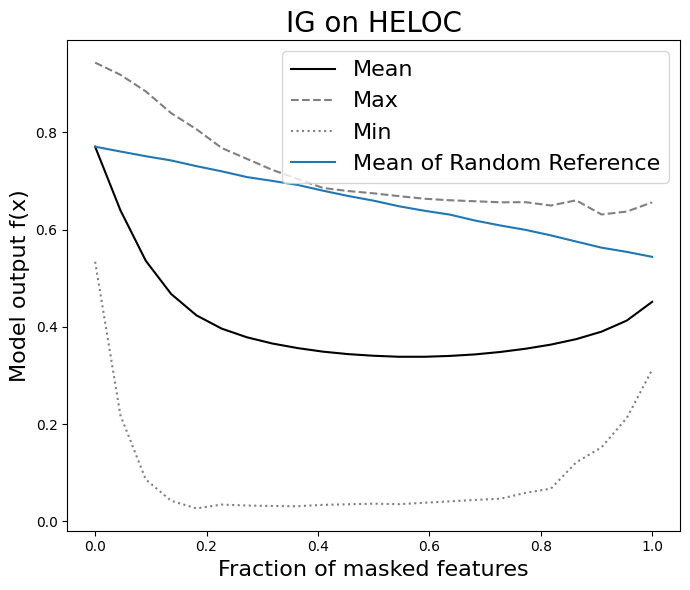

In [7]:
from baselines import MeanBaseline
from data import HELOC

data = HELOC(mode="validation")

mean_baseline_generator = MeanBaseline(data)
mean_baseline = mean_baseline_generator.get_baseline()

evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC",
    attribution_baseline=mean_baseline_generator,
    masking_baseline=mean_baseline_generator,
    apply_log=False
)

  0%|          | 0/986 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
100%|██████████| 986/986 [00:02<00:00, 372.79it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


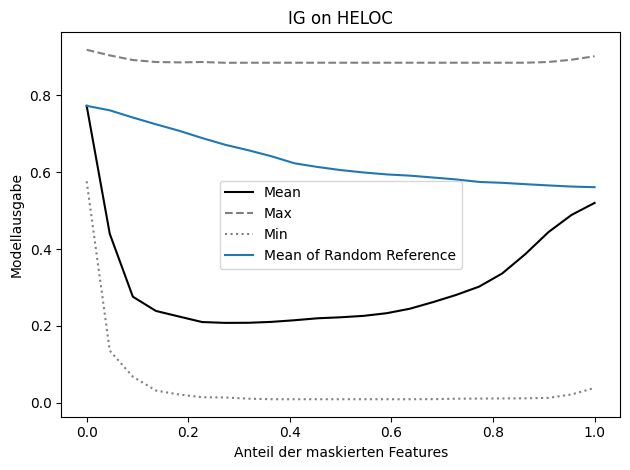

In [ ]:
from baselines import ZeroBaseline
zero_baseline_generator = ZeroBaseline(model)
zero_baseline = zero_baseline_generator.get_baseline()

evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC",
    attribution_baseline=zero_baseline_generator,
    masking_baseline=zero_baseline_generator,
    apply_log=False
)